# Baseball Case Study

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. 

import the required library packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score, roc_curve

from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC,SVR
from sklearn.linear_model import Ridge, Lasso,RidgeCV, LassoCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.feature_selection import SelectPercentile,chi2
from sklearn.ensemble import GradientBoostingClassifier

import the dataset 

In [3]:
df=pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


analyse the dataset

In [5]:
df.shape

(30, 17)

rename the column features for better understanding

In [6]:
df=df.rename(columns={'W':'win','R':'run','AB':'atbat','H':'hit','2B':'2base','3B':'3base','HR':'homerun','BB':'ballbase','SO':'strikeout','SB':'stolenbase','RA':'runavg','ER':'earnrun','ERA':'earnrunavg','CG':'cmpltgame','SHO':'shutout','SV':'save','E':'error'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   win         30 non-null     int64  
 1   run         30 non-null     int64  
 2   atbat       30 non-null     int64  
 3   hit         30 non-null     int64  
 4   2base       30 non-null     int64  
 5   3base       30 non-null     int64  
 6   homerun     30 non-null     int64  
 7   ballbase    30 non-null     int64  
 8   strikeout   30 non-null     int64  
 9   stolenbase  30 non-null     int64  
 10  runavg      30 non-null     int64  
 11  earnrun     30 non-null     int64  
 12  earnrunavg  30 non-null     float64
 13  cmpltgame   30 non-null     int64  
 14  shutout     30 non-null     int64  
 15  save        30 non-null     int64  
 16  error       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


we can understand from the information that there are no null in the data set and all are numerical data

In [8]:
df.nunique()

win           24
run           28
atbat         29
hit           29
2base         22
3base         23
homerun       27
ballbase      29
strikeout     29
stolenbase    27
runavg        30
earnrun       30
earnrunavg    30
cmpltgame      9
shutout       12
save          20
error         21
dtype: int64

In [9]:
df.describe()

,win,run,atbat,hit,2base,3base,homerun,ballbase,strikeout,stolenbase,runavg,earnrun,earnrunavg,cmpltgame,shutout,save,error
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


observed: data is descrete 
std deviation is lesser than mean in all features 
there is good relation in the quartiles , but some have highmax values 


In [10]:
df.duplicated().value_counts()

False    30
Name: count, dtype: int64

there are no duplicated rows in the rows!!

<Axes: >

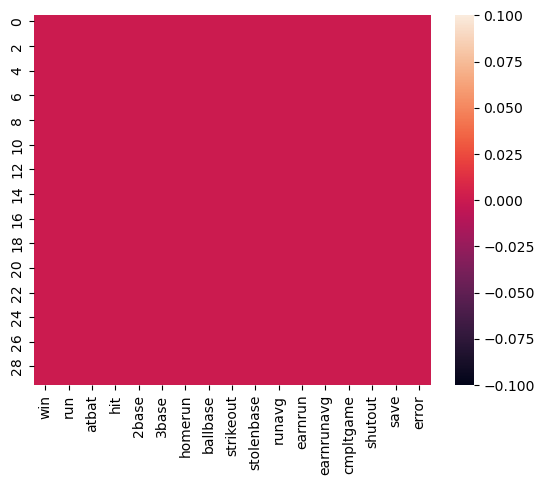

In [11]:
sns.heatmap(df.isnull())

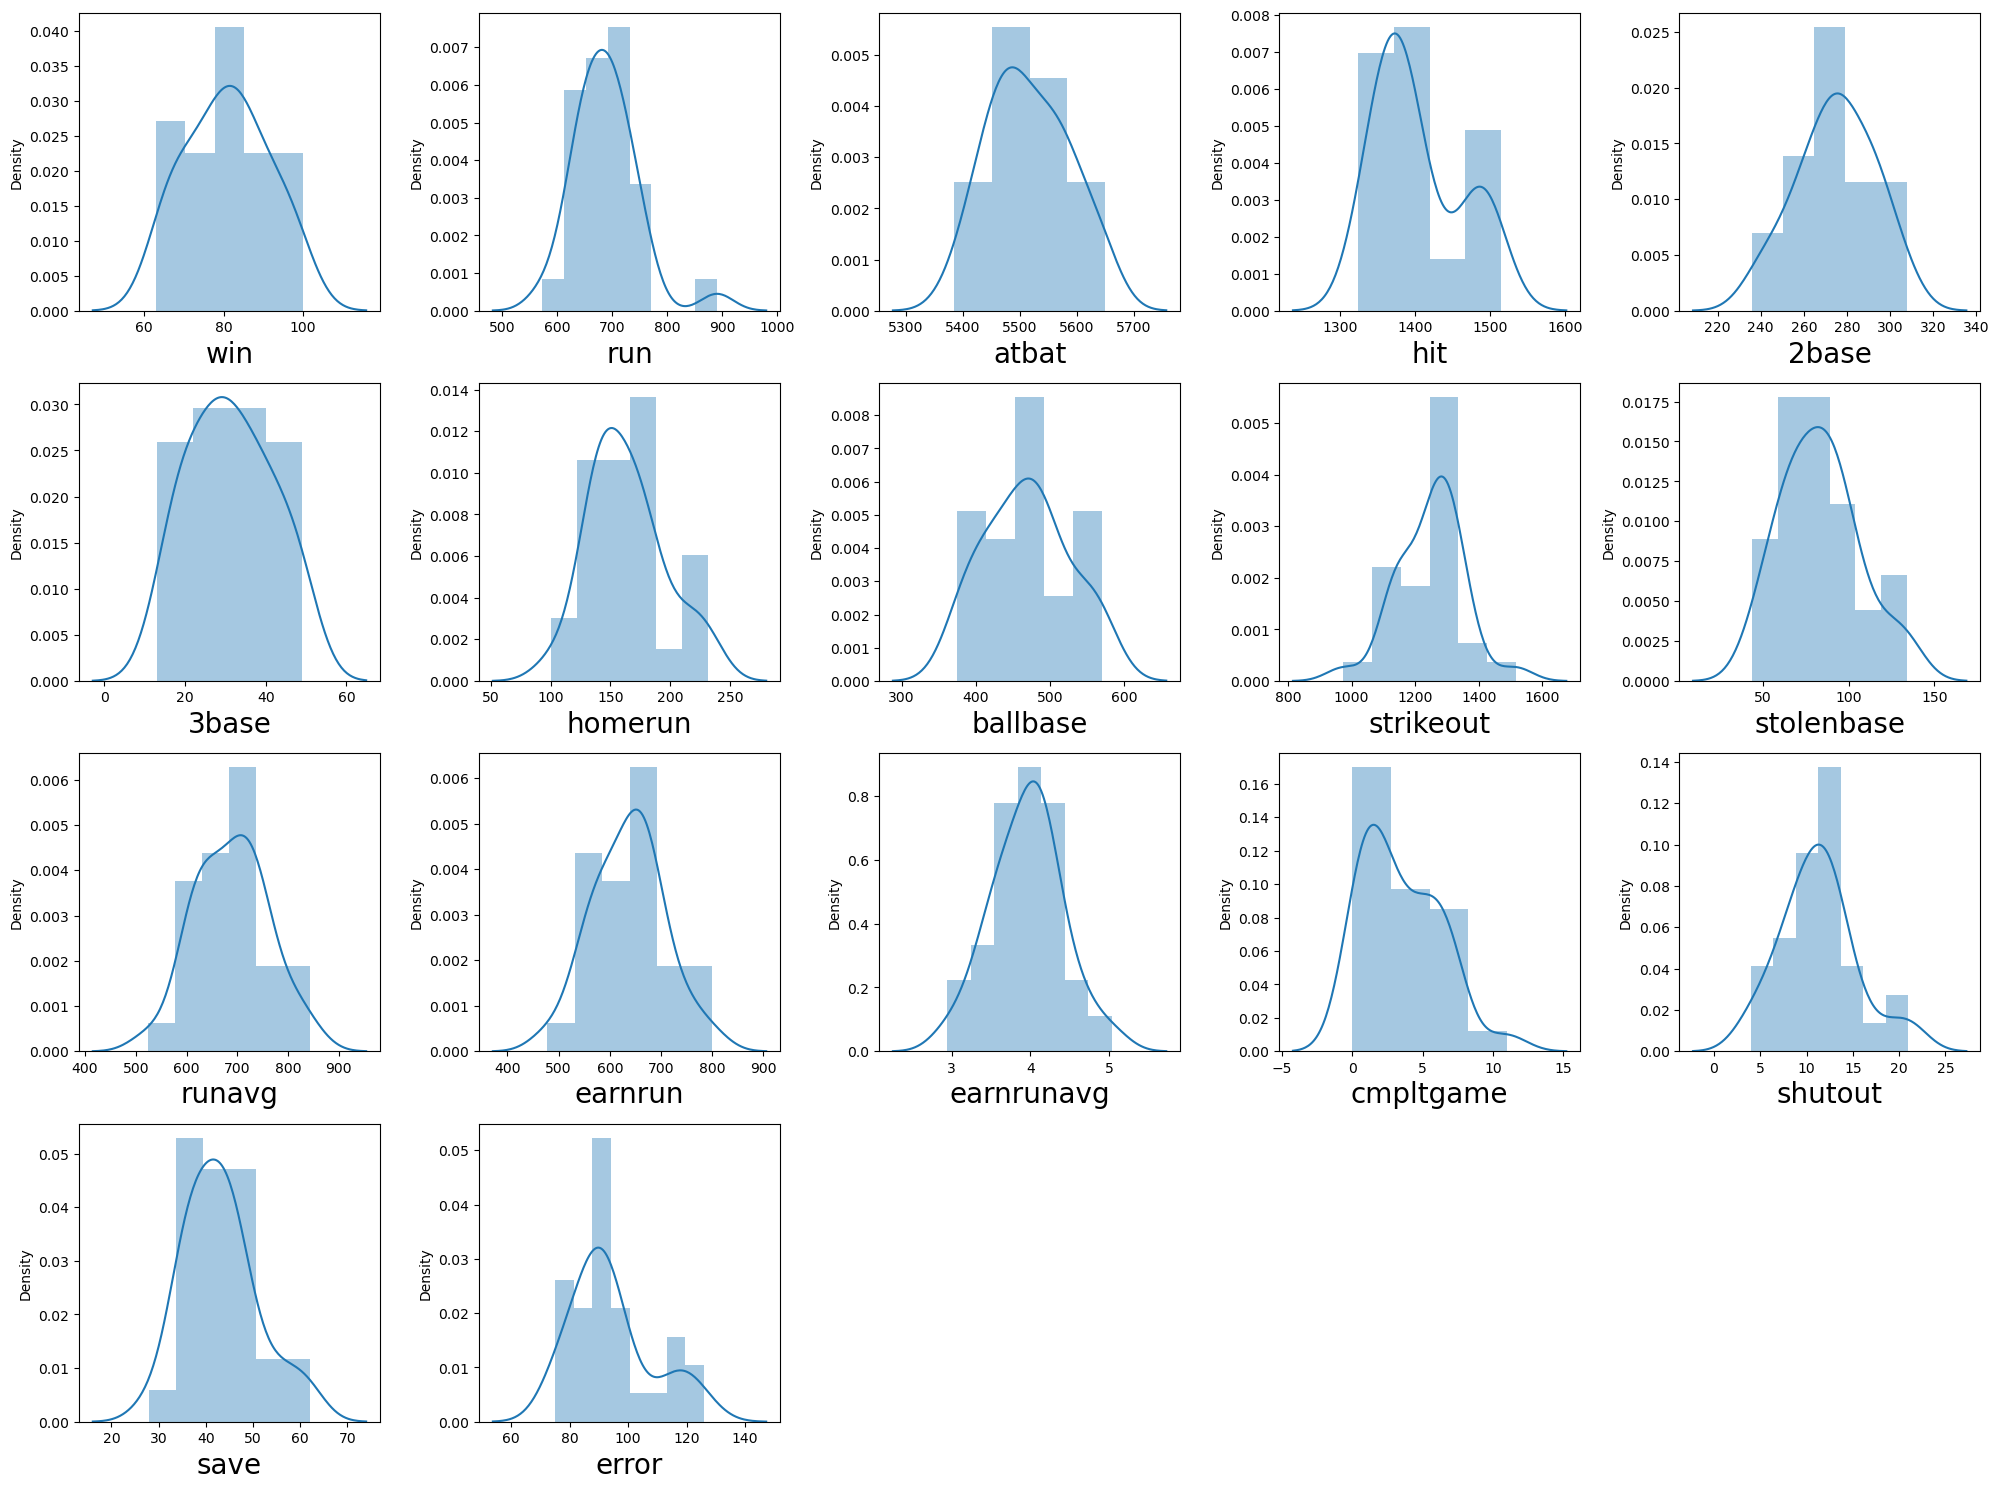

In [12]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
    if plotnumber<=18:
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(df[column]) 
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

we observe that there is good distribution among the data

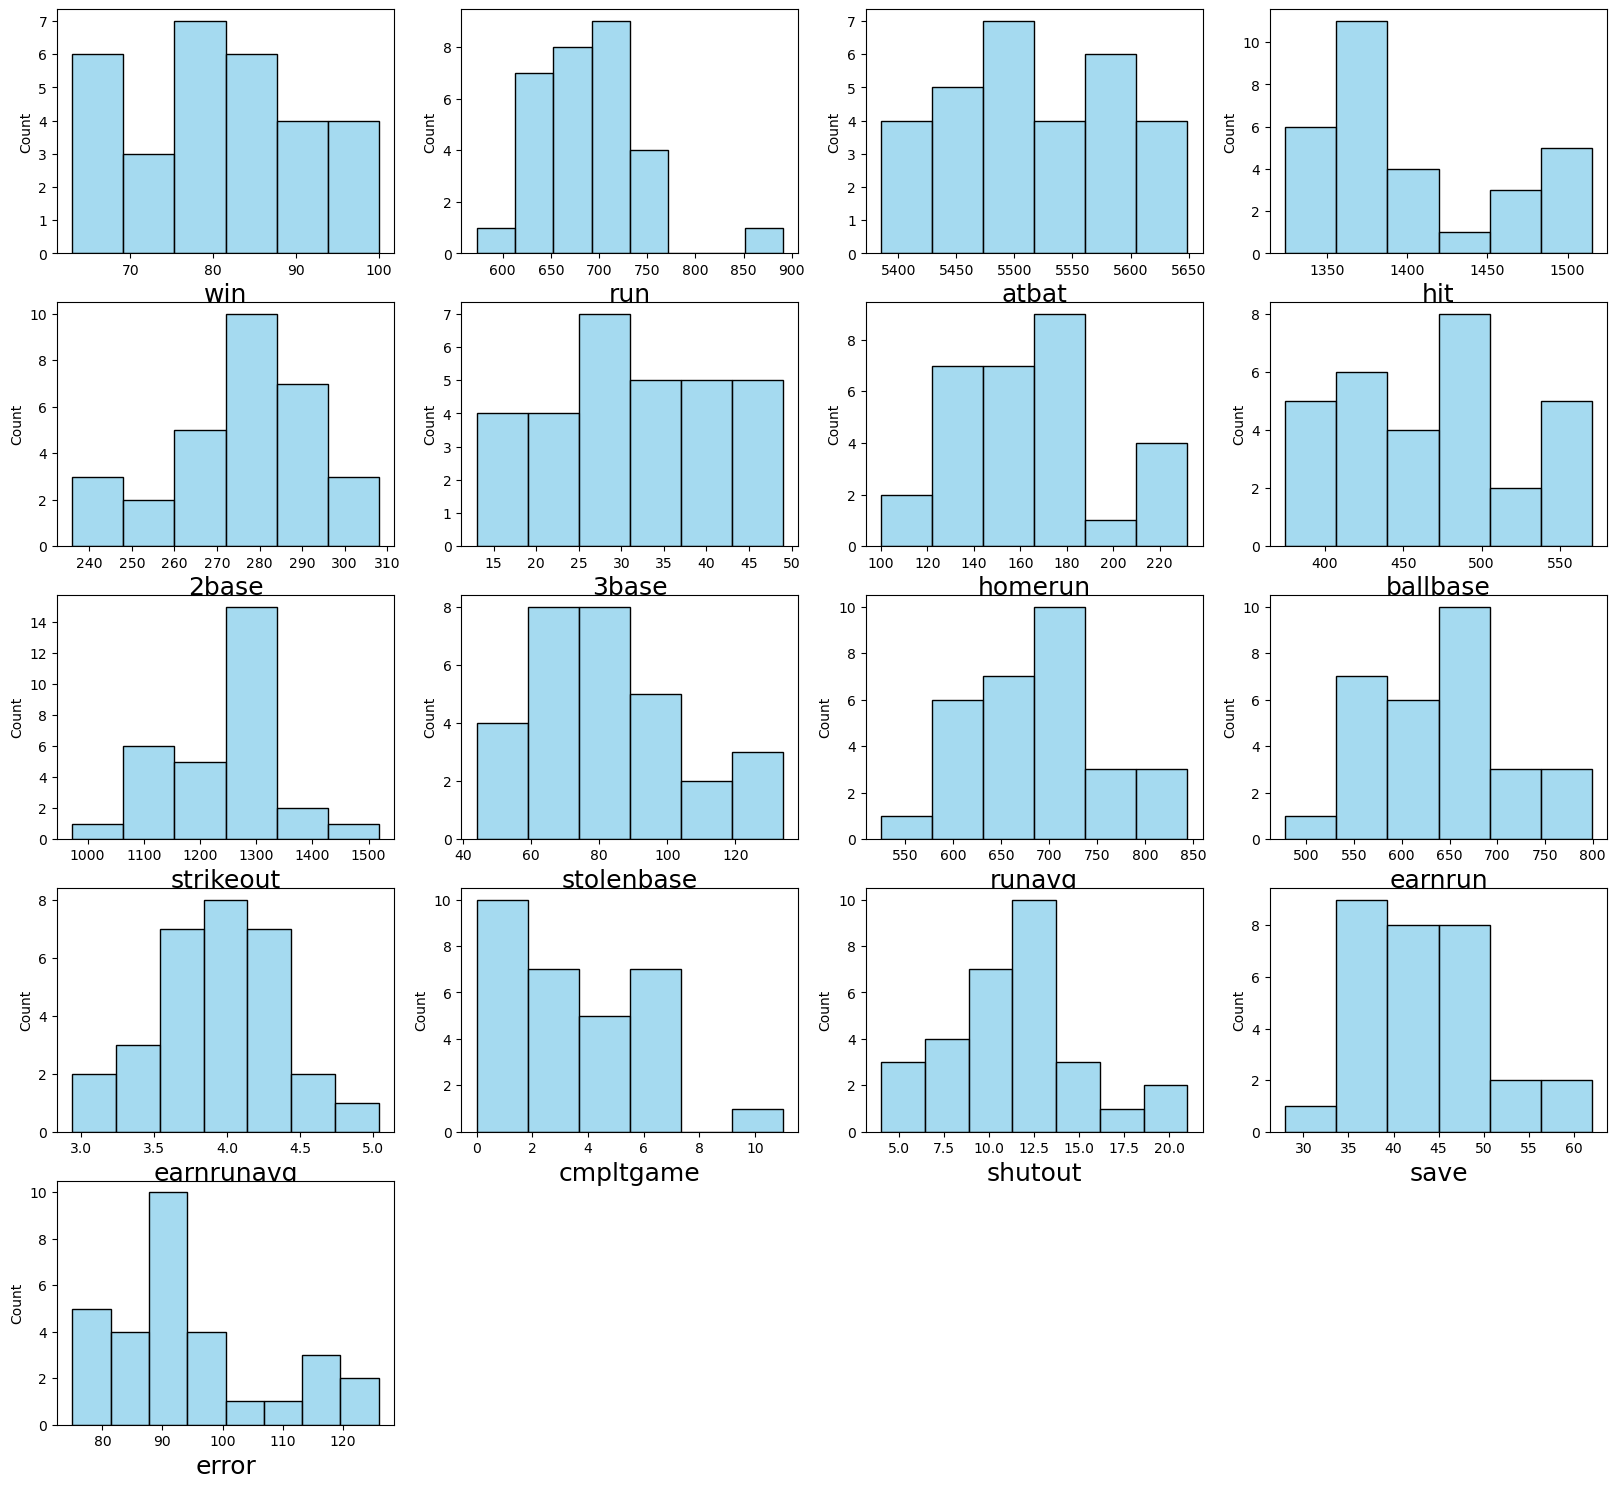

In [13]:
plt.figure(figsize = (20,45))
plotnumber = 1

for column in df:
    if plotnumber <=18:
        ax = plt.subplot(12,4,plotnumber)
        sns.histplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=18)
        
    plotnumber += 1
plt.show()

In [14]:
df_feat=df.drop('win',axis=1)

analysing the outliers 

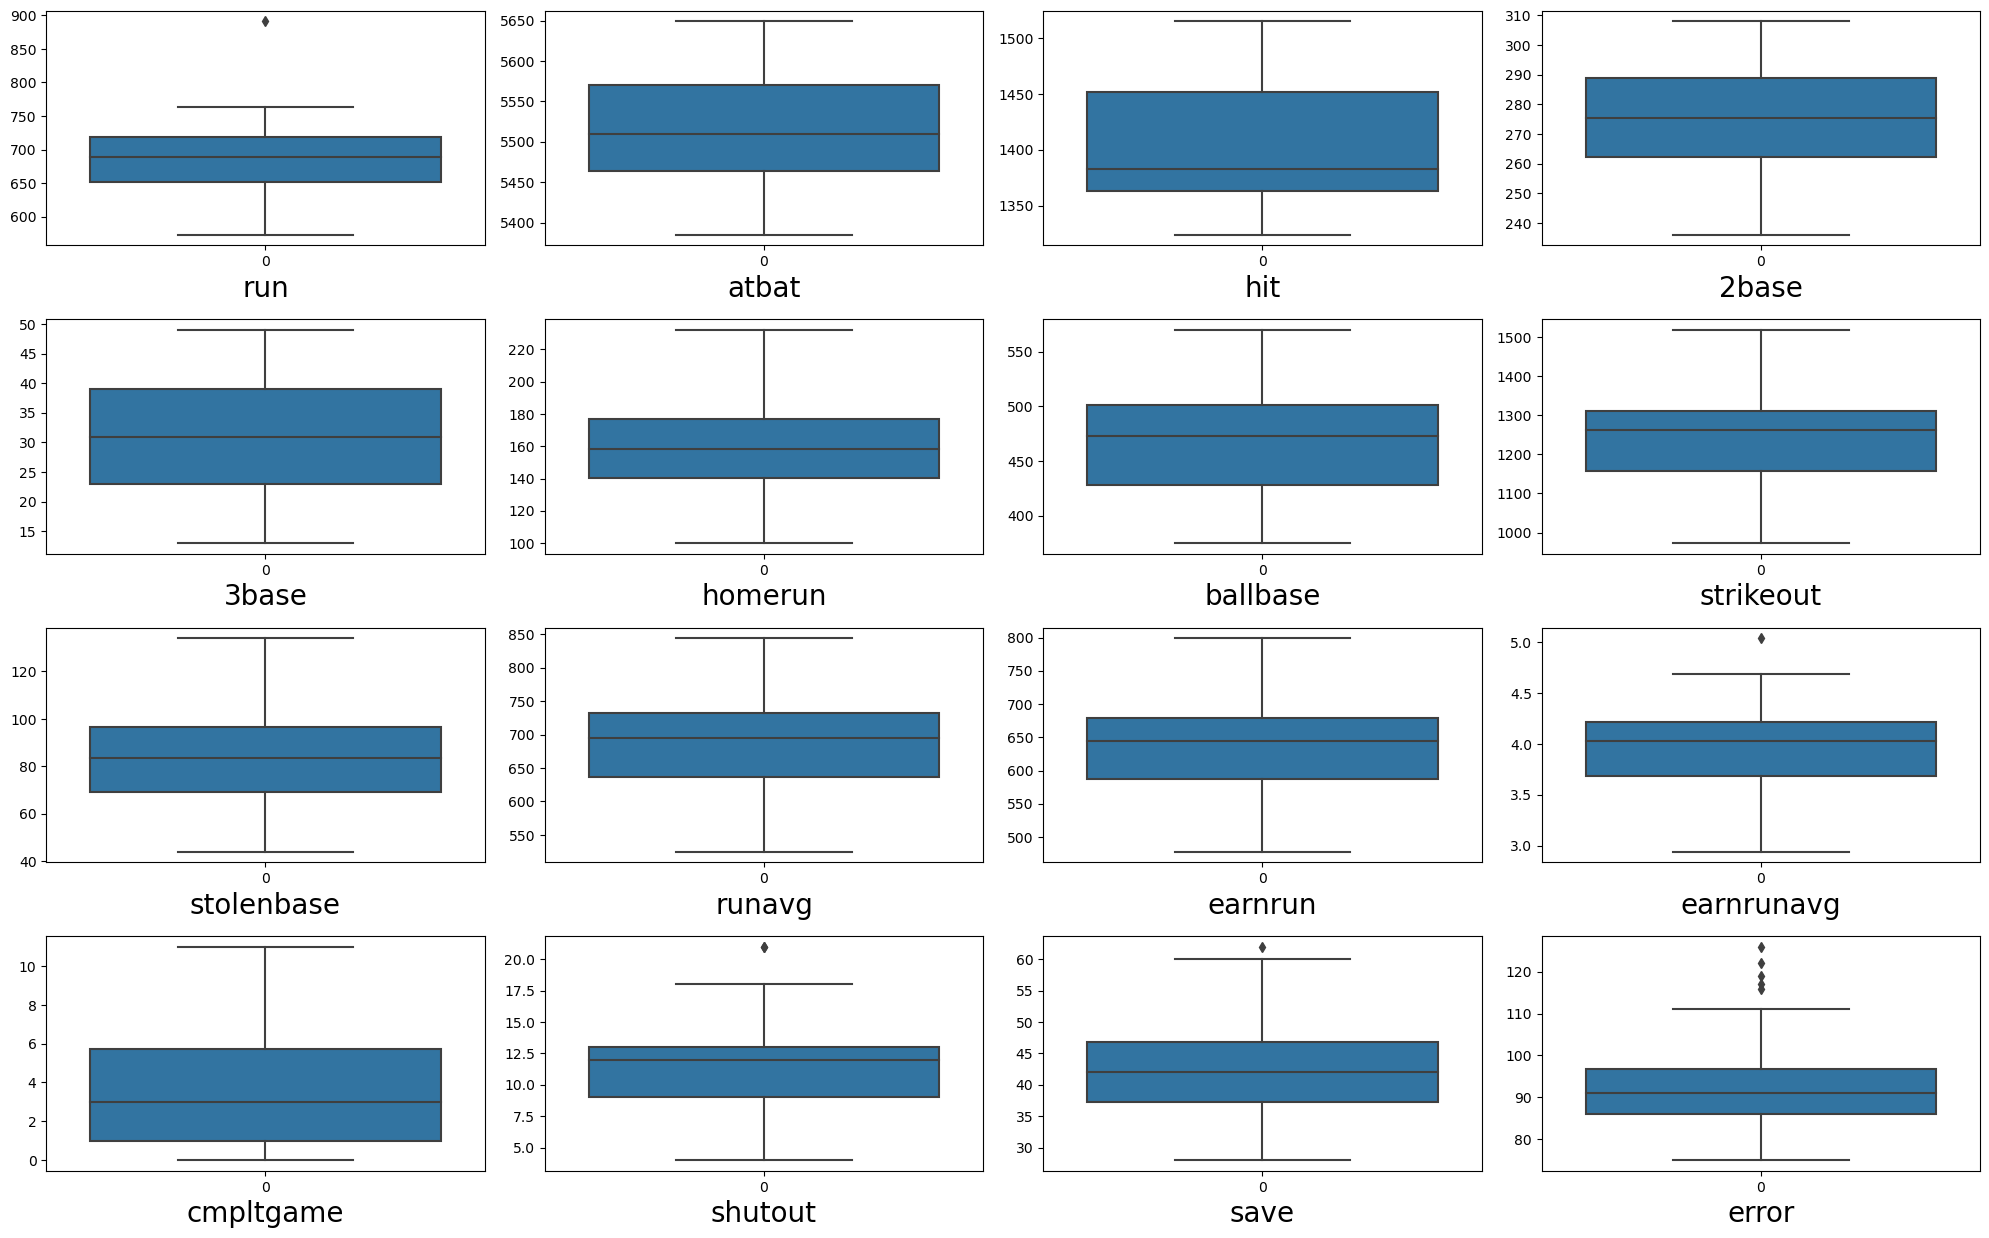

In [15]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df_feat:
    if plotnumber<=18:
        plt.subplot(5,4,plotnumber)
        ax=sns.boxplot(data=df_feat[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout() 

In [16]:
df.shape

(30, 17)

removing the outliers

In [17]:
from scipy.stats import zscore
features=df[['run','earnrun','shutout','save','error']]
z=np.abs(zscore(features))
df=df[(z<3).all(axis=1)]
df.shape

(29, 17)

bivarient analysis

In [18]:
x=df.drop(['win'],axis=1)
y=df['win']

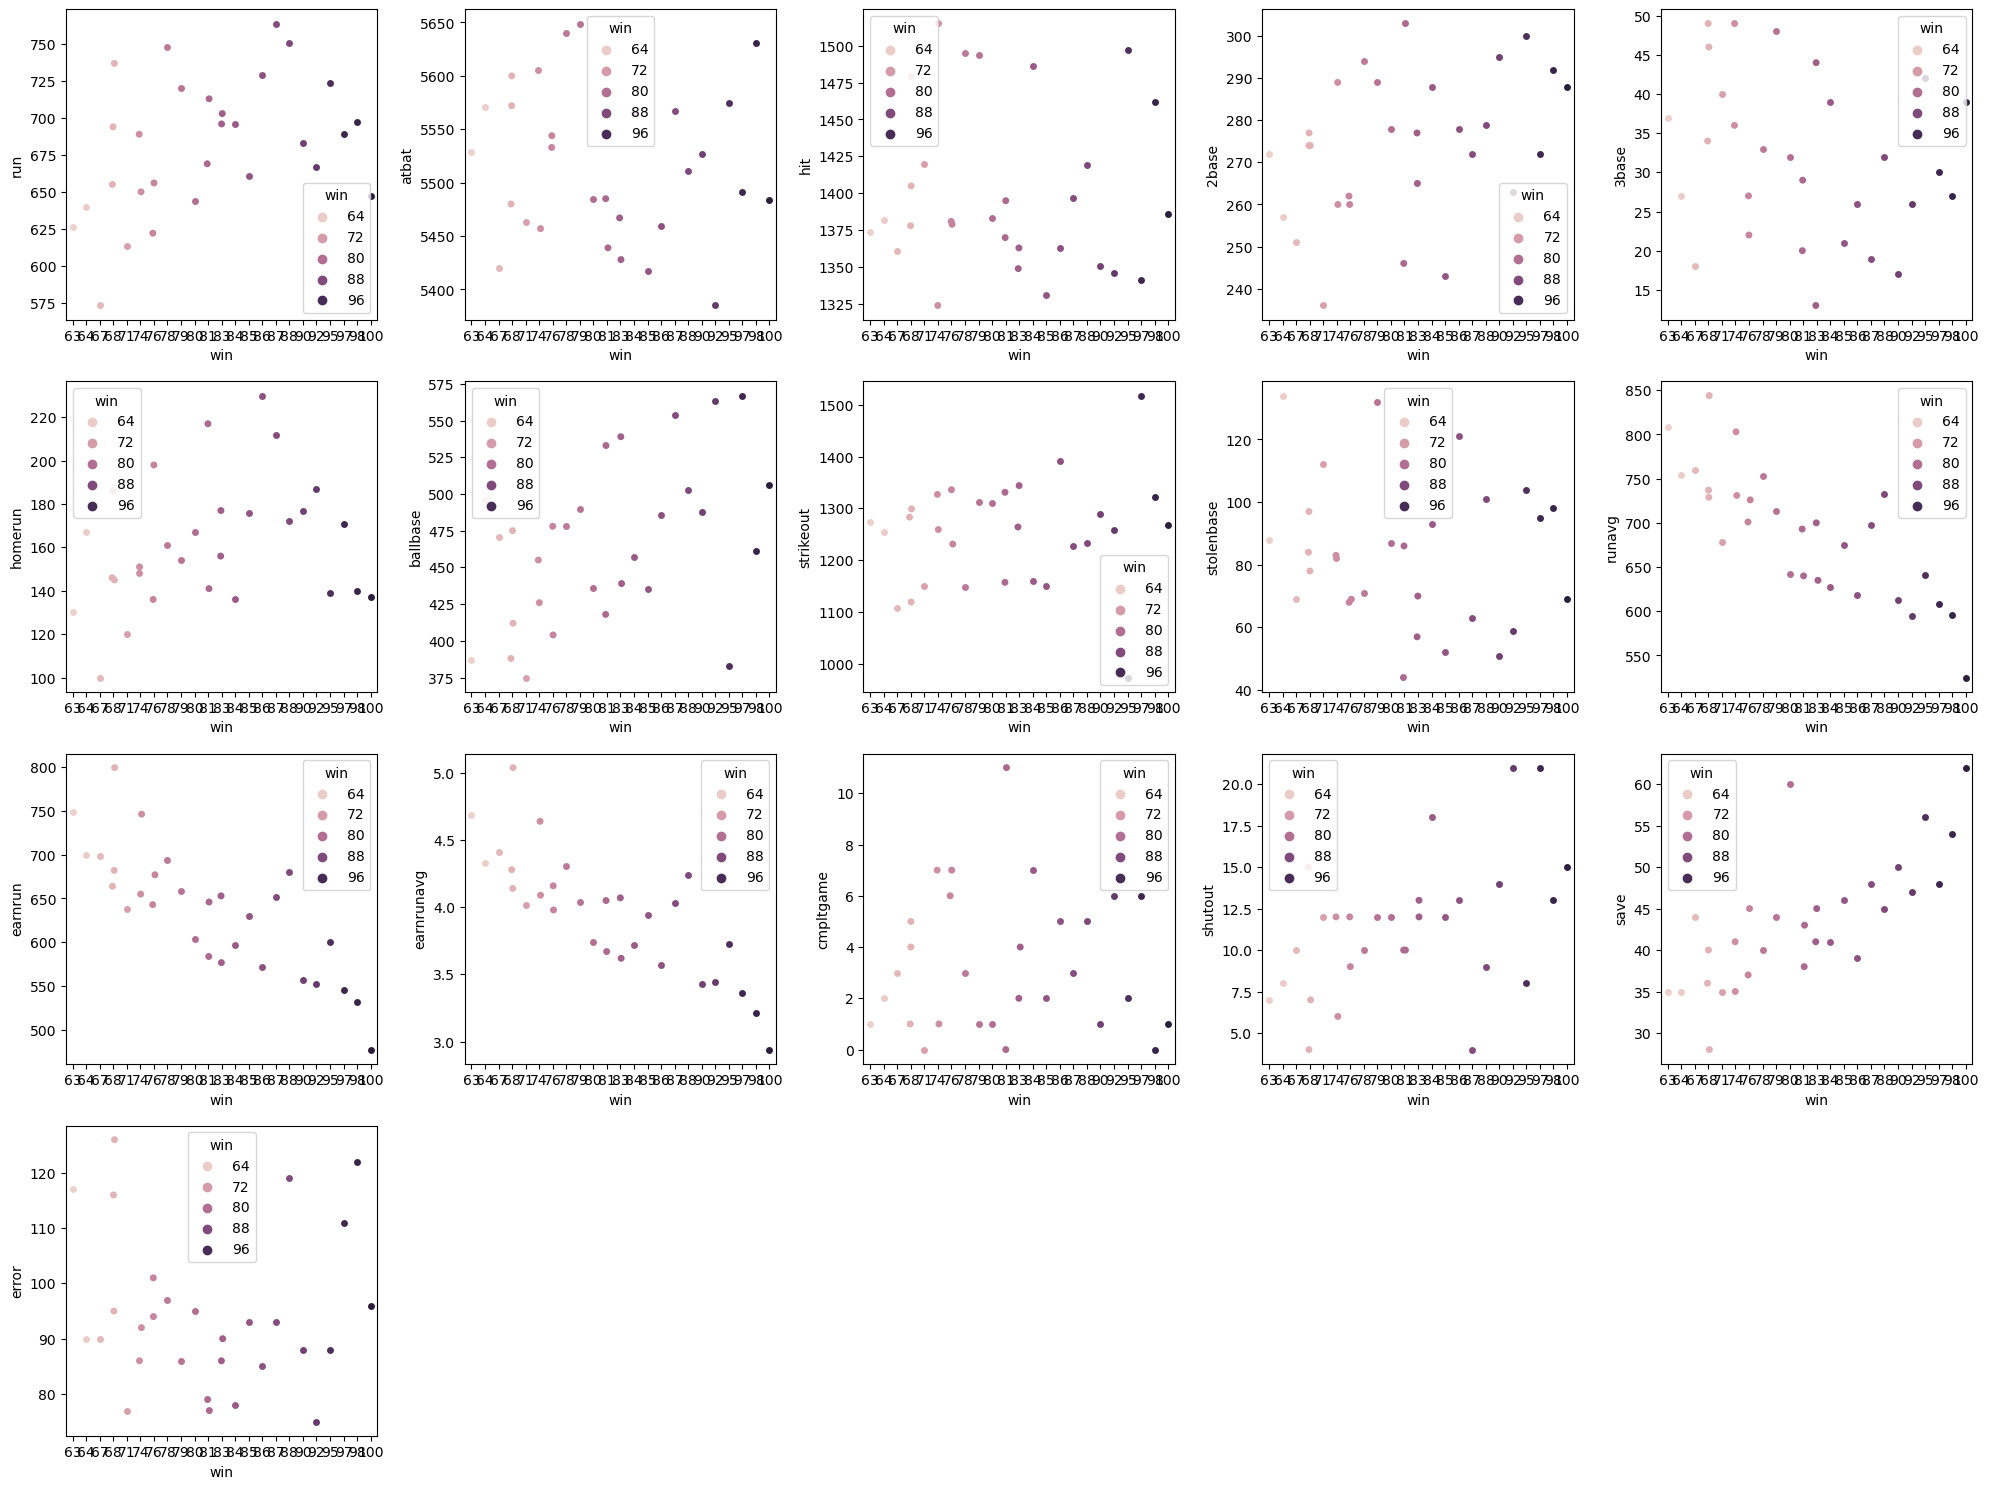

In [19]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in x:
    if plotnumber<=18:
        ax=plt.subplot(4,5 ,plotnumber)
        sns.stripplot(x=y,y=x[column],hue=y) 
    plotnumber+=1
plt.tight_layout()

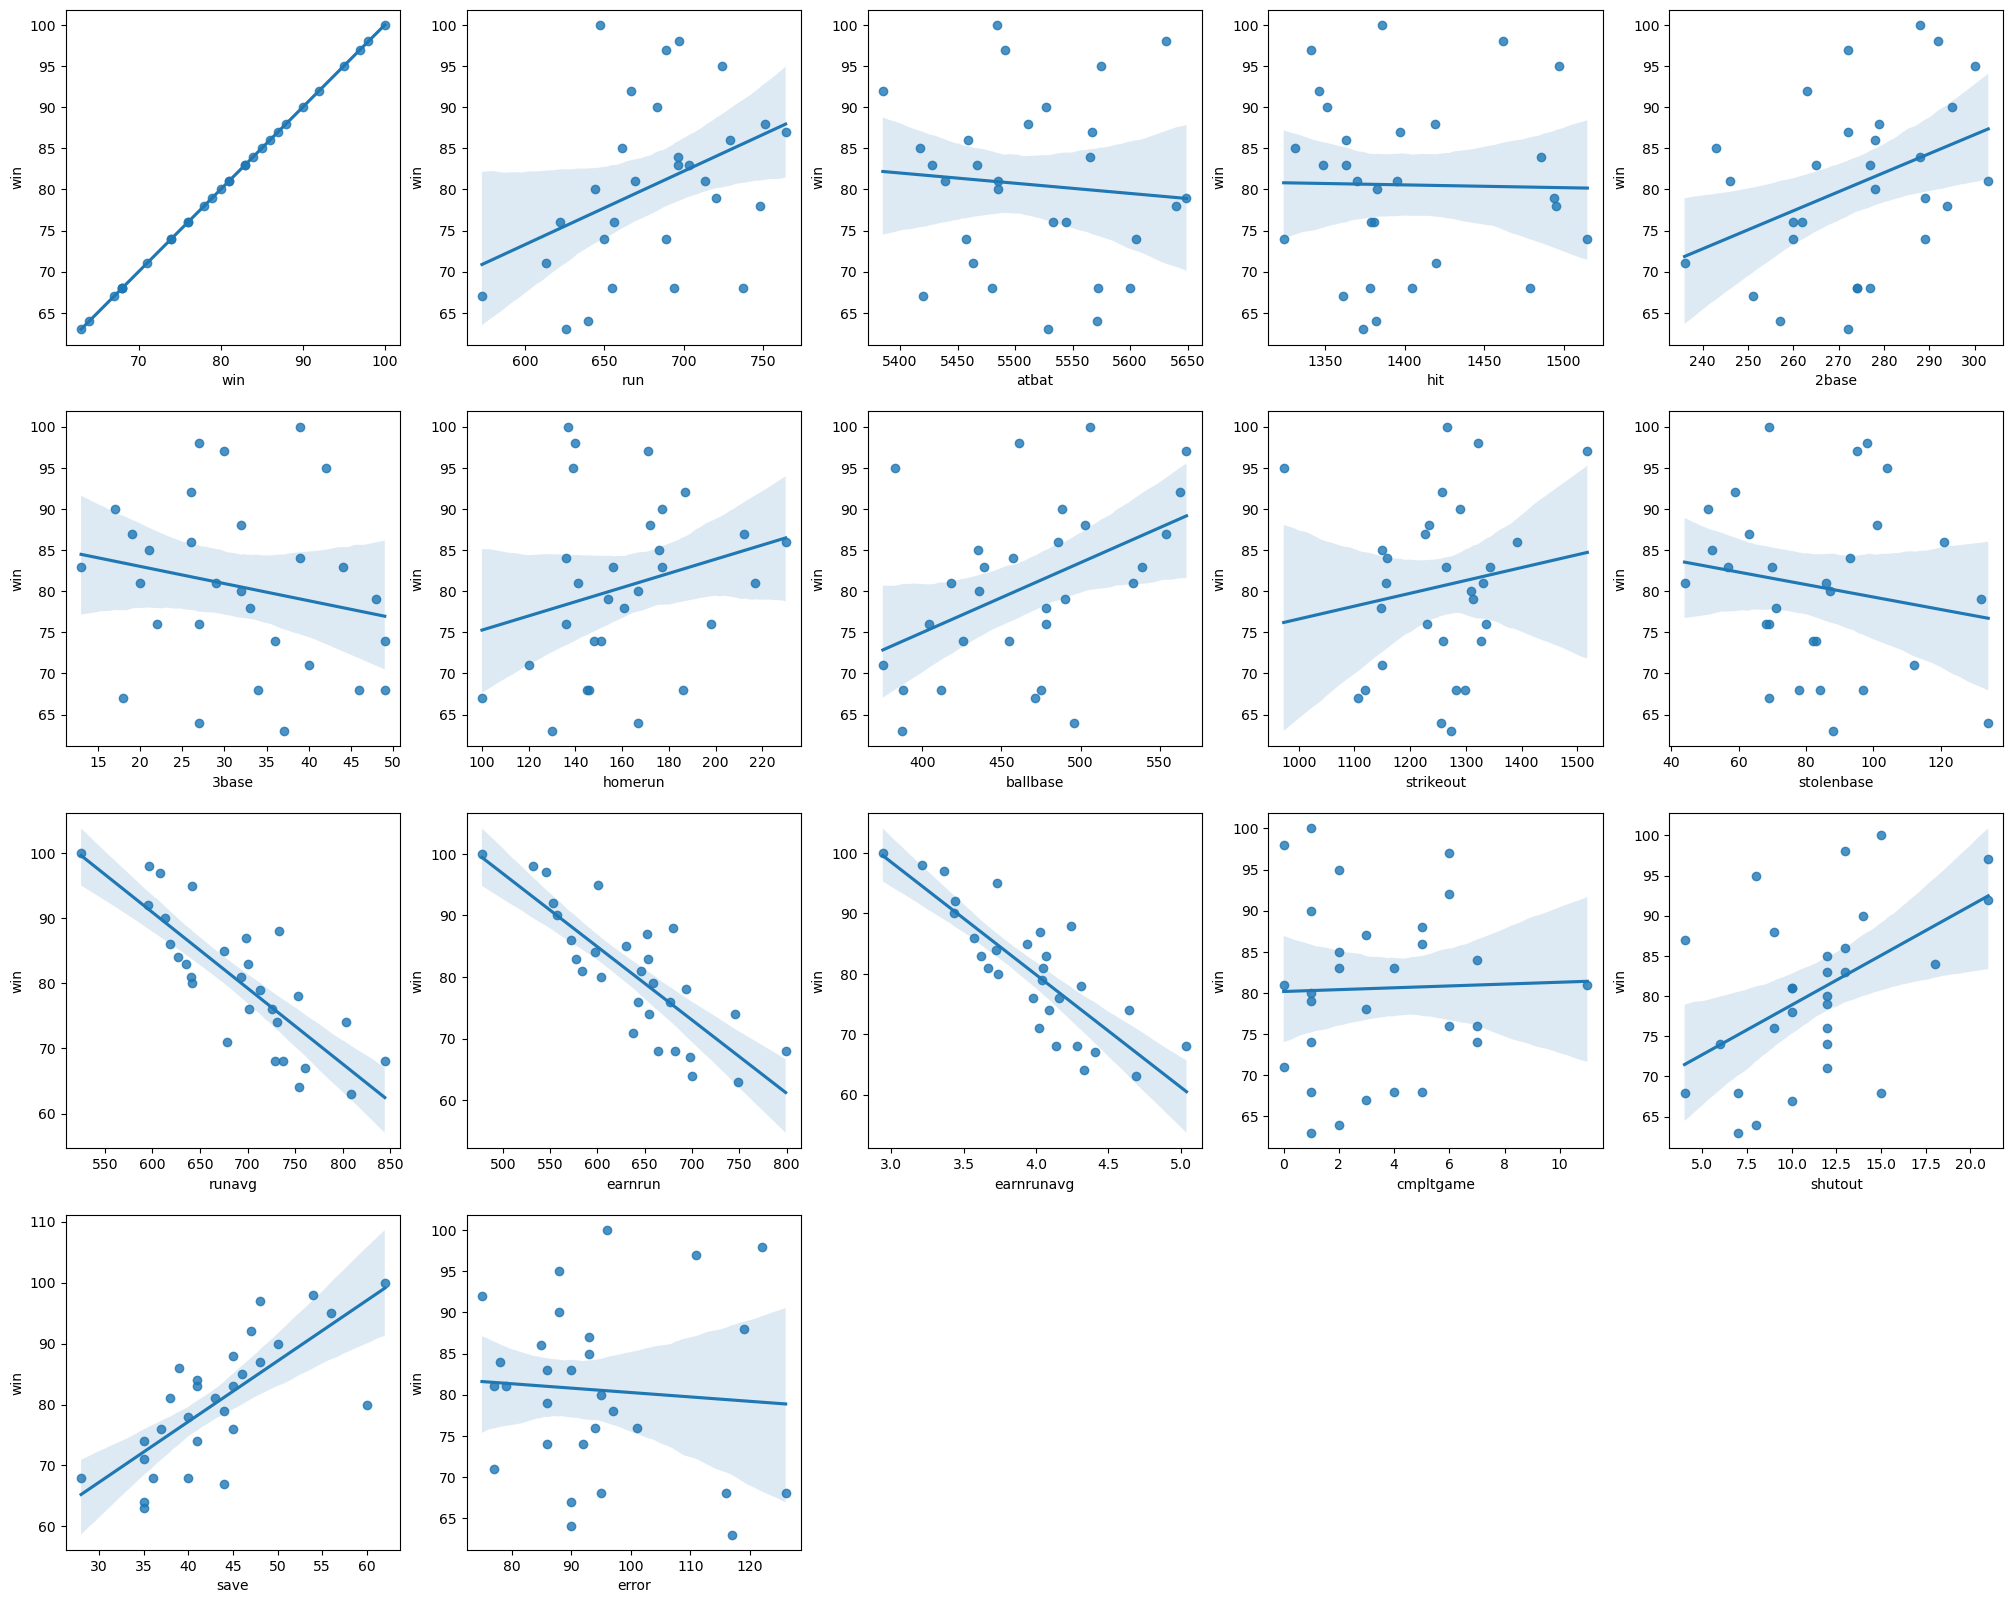

In [20]:
plt.figure(figsize=(25, 20))
plotnumber = 1

for column in df.columns:
    if plotnumber <= 20:
        plt.subplot(4, 5, plotnumber) 
        sns.regplot(x=df[column], y=df['win'])
        plt.xlabel(column)
        plt.ylabel('win')
        plotnumber += 1
plt.show()

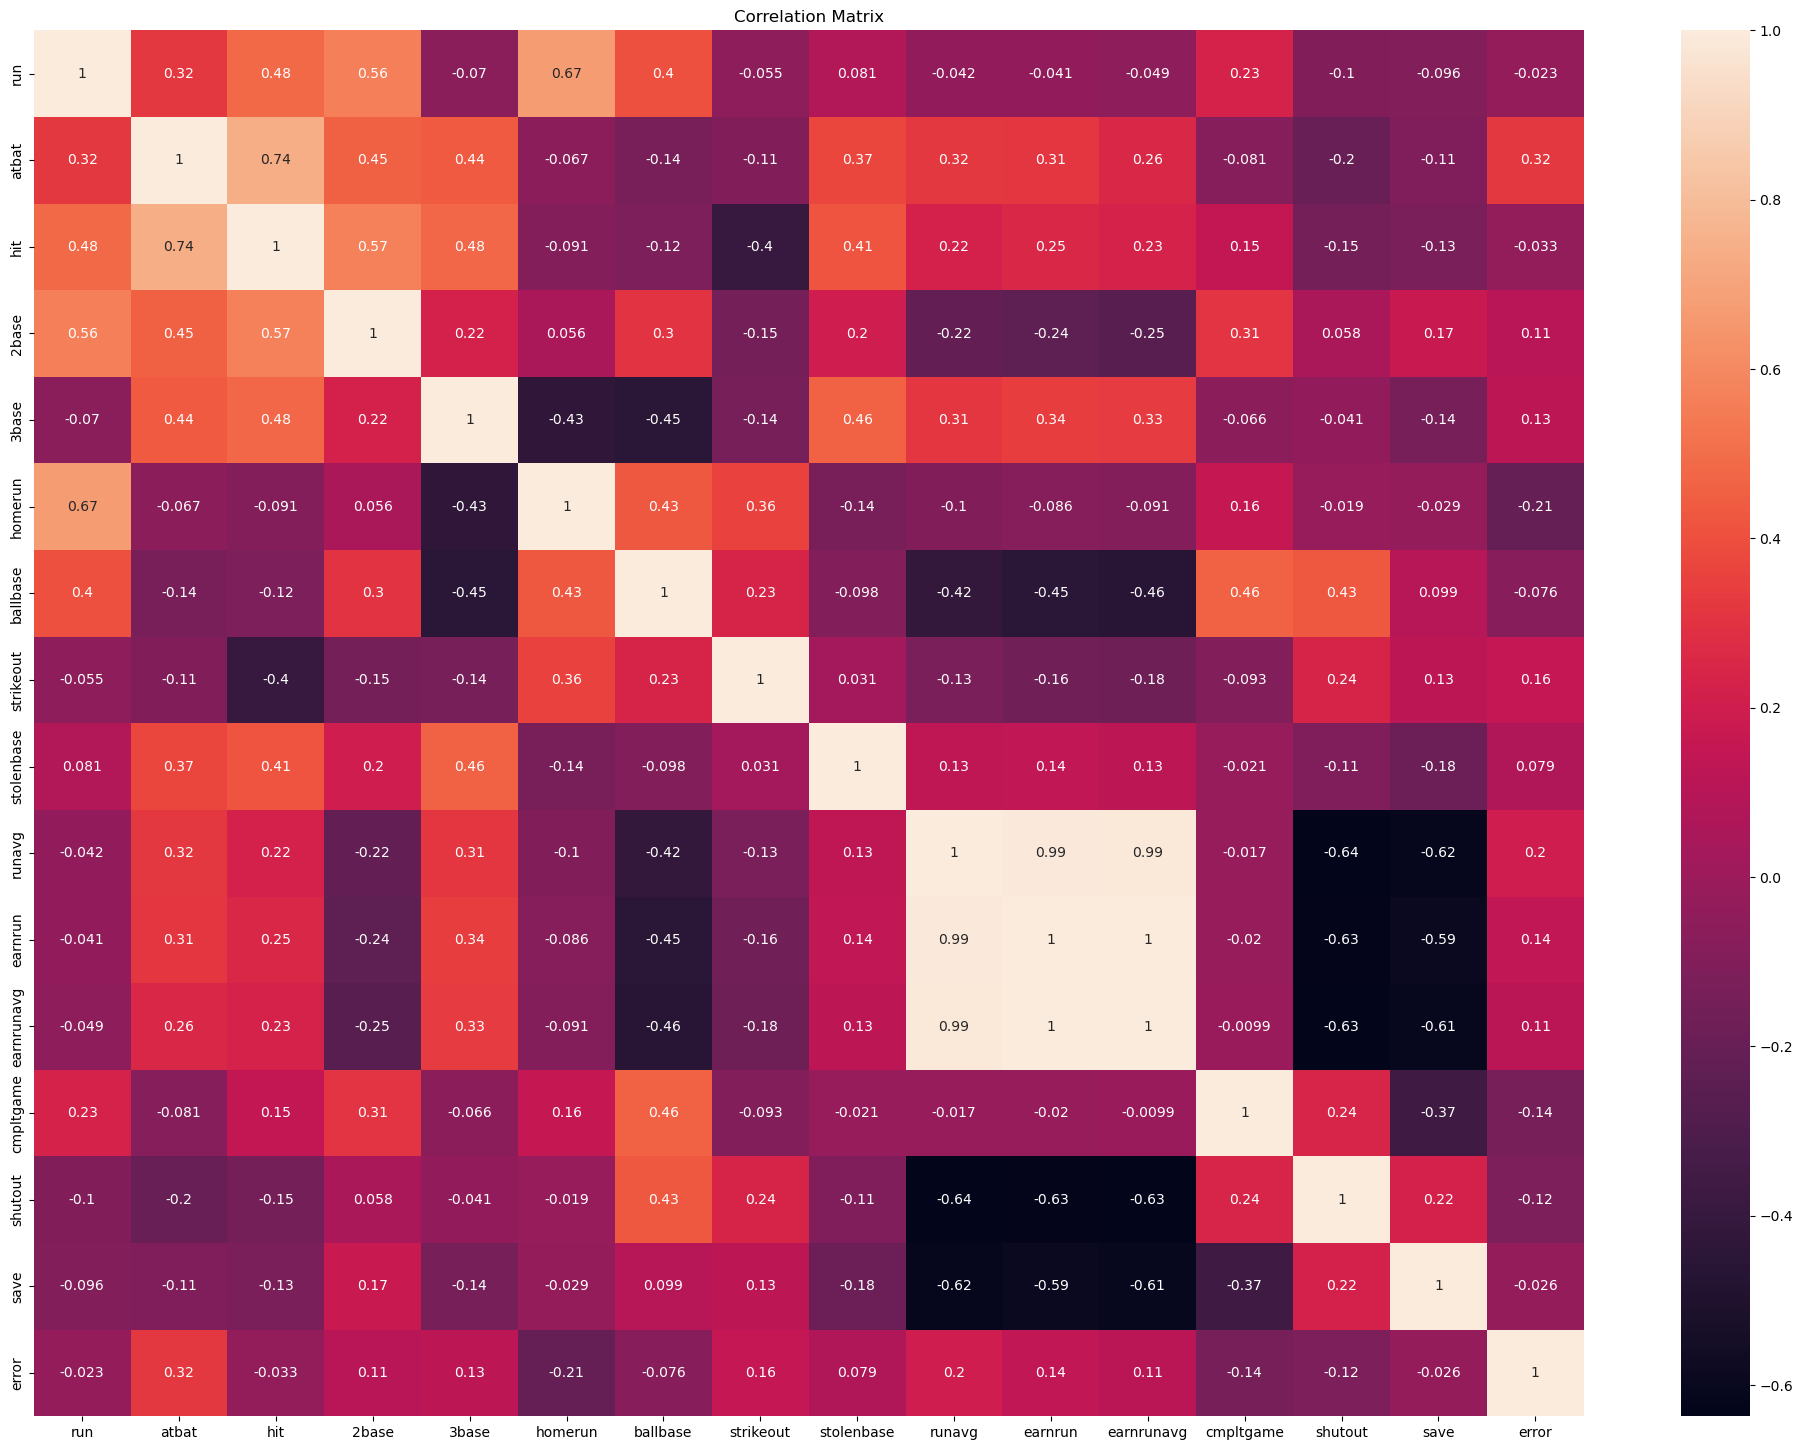

In [21]:
plt.figure(figsize = [25, 18])
sns.heatmap(df_feat.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

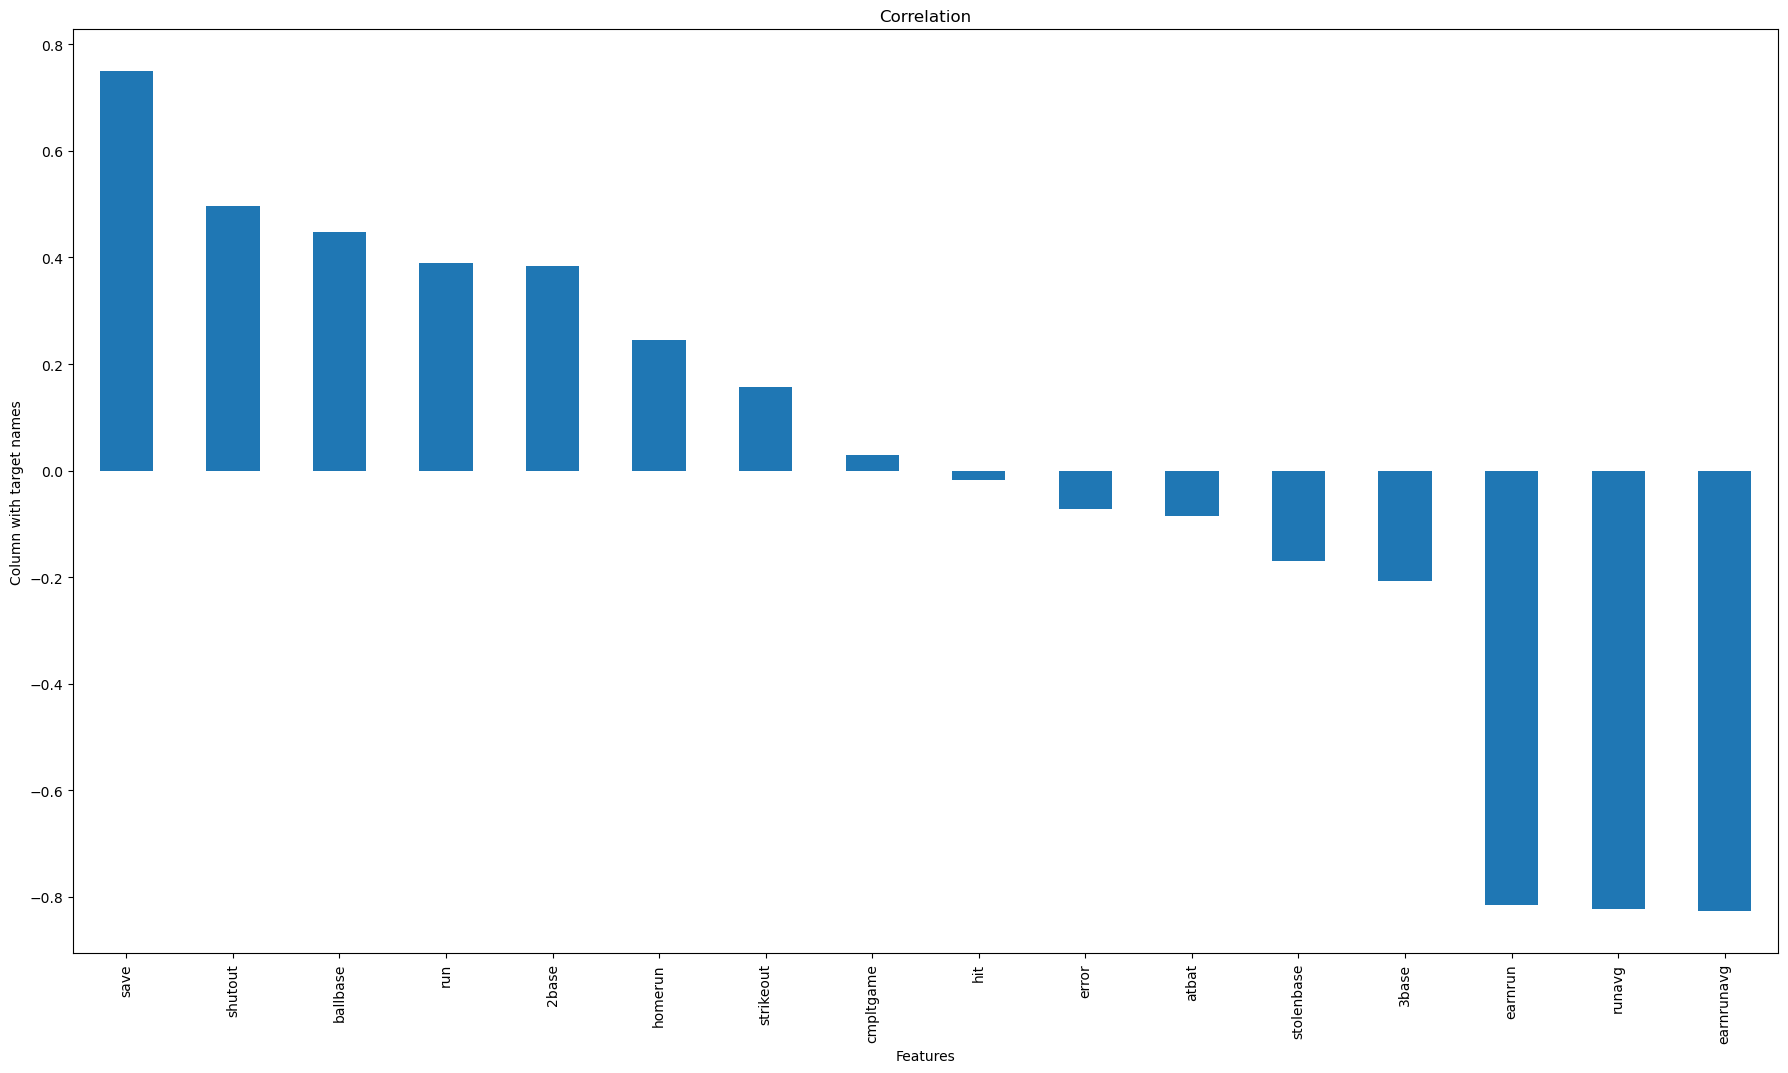

In [22]:
plt.figure(figsize =(22, 12))
df.corr()['win'].sort_values(ascending = False).drop(['win']).plot(kind ='bar')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

In [25]:
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (x, i) for i in range (x.shape[1])]
vif["Features"] = x.columns

vif

,vif,Features
0,1684.071804,run
1,4386.435411,atbat
2,4542.383497,hit
3,874.293076,2base
4,35.695117,3base
5,267.423009,homerun
6,260.583556,ballbase
7,399.764153,strikeout
8,28.928494,stolenbase
9,17975.314054,runavg


In [26]:
def corr_columns(df, threshold):
    correlated_columns = set()
    for i, col1 in enumerate(df.columns):
        for j, col2 in enumerate(df.columns[:i]):
            if abs(df[col1].corr(df[col2])) > threshold:
                correlated_columns.add(col1)
    
    return correlated_columns


In [28]:
features = corr_columns(df, 0.5)
len(set(features))

9

In [29]:
features

{'2base',
 '3base',
 'earnrun',
 'earnrunavg',
 'hit',
 'homerun',
 'runavg',
 'save',
 'shutout'}

In [30]:
df.columns

Index(['win', 'run', 'atbat', 'hit', '2base', '3base', 'homerun', 'ballbase',
       'strikeout', 'stolenbase', 'runavg', 'earnrun', 'earnrunavg',
       'cmpltgame', 'shutout', 'save', 'error'],
      dtype='object')

In [31]:
x = df.drop(columns=['win','hit','atbat','strikeout', 'stolenbase','cmpltgame','error'], axis=1) 
y= df.win 

In [32]:
scaler=StandardScaler()
x_sca=scaler.fit_transform(x)

In [33]:
x_train,x_test,y_train, y_test = train_test_split(x_sca,y,test_size=0.25,random_state=20)

In [34]:
maxAccu=0
LR=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_sca,y,test_size=0.3,random_state=i)
    LG = LinearRegression()
    LG.fit(x_train, y_train)
    pred=LG.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.9443901380993509 on random state 30


In [35]:
LR.fit(x_train,y_train)

LinearRegression()

In [36]:
x.tail(2)

,run,2base,3base,homerun,ballbase,runavg,earnrun,earnrunavg,shutout,save
28,650,260,36,148,426,731,655,4.09,6,41
29,737,274,49,186,388,844,799,5.04,4,36


In [37]:
y.tail(2)

28    74
29    68
Name: win, dtype: int64

In [38]:
print('chance of win',LR.predict(scaler.transform([[650,260,36,148,426,731,655,4.09,6,41]])))

chance of win [68.99902196]


prediction is correct !!

In [39]:
LR.score(x_train,y_train)

0.9005928066077915

In [40]:
LR.score(x_test,y_test)

0.8415689304800332

In [41]:
y_pred=LR.predict(x_test)
y_pred

array([98.52749984, 76.80714142, 83.86743752, 90.89600818, 97.72014094,
       83.48957597, 68.99902196, 81.18616448, 63.73922539])

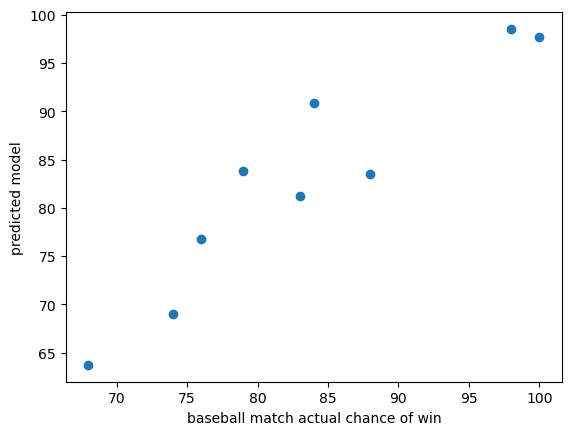

In [42]:
plt.scatter(y_test,y_pred)
plt.xlabel("baseball match actual chance of win")
plt.ylabel("predicted model")
plt.show()

In [43]:
mean_absolute_error(y_test,y_pred)

3.440439799945862

In [44]:
mean_squared_error(y_test,y_pred)

16.019141473685536

In [45]:
np.sqrt(mean_squared_error(y_test,y_pred))

4.002391969021217

learning rate understanding

In [46]:
lcv=LassoCV(alphas= None, max_iter=50)
lcv.fit(x_train,y_train)

LassoCV(max_iter=50)

In [47]:
alpha=lcv.alpha_
alpha

0.6305601671436335

In [48]:
lso_reg=Lasso(alpha)
lso_reg.fit(x_train,y_train)

Lasso(alpha=0.6305601671436335)

In [49]:
lso_reg.score(x_test,y_test)

0.9221277317897507

In [50]:
# see for regresion 
LR.score(x_train,y_train)

0.9005928066077915

In [51]:
ridgecv=RidgeCV(alphas=np.arange(0.0001,0.1,0.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.0001, 0.0101, 0.0201, 0.0301, 0.0401, 0.0501, 0.0601, 0.0701,
       0.0801, 0.0901]))

In [52]:
ridgecv.alpha_ 

0.0901

In [53]:
rid_model=Ridge(alpha=ridgecv.alpha_)
rid_model.fit(x_train,y_train)

Ridge(alpha=0.0901)

In [54]:
rid_model.score(x_test,y_test)

0.9307680886531944

So, no over fitting

In [55]:
import pickle

In [56]:
pickle.dump (LR, open('LR_model', 'wb'))